In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
data.drop(columns = 'Standard Error', inplace = True)

In [8]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Dystopia Residual'}>]], dtype=object)

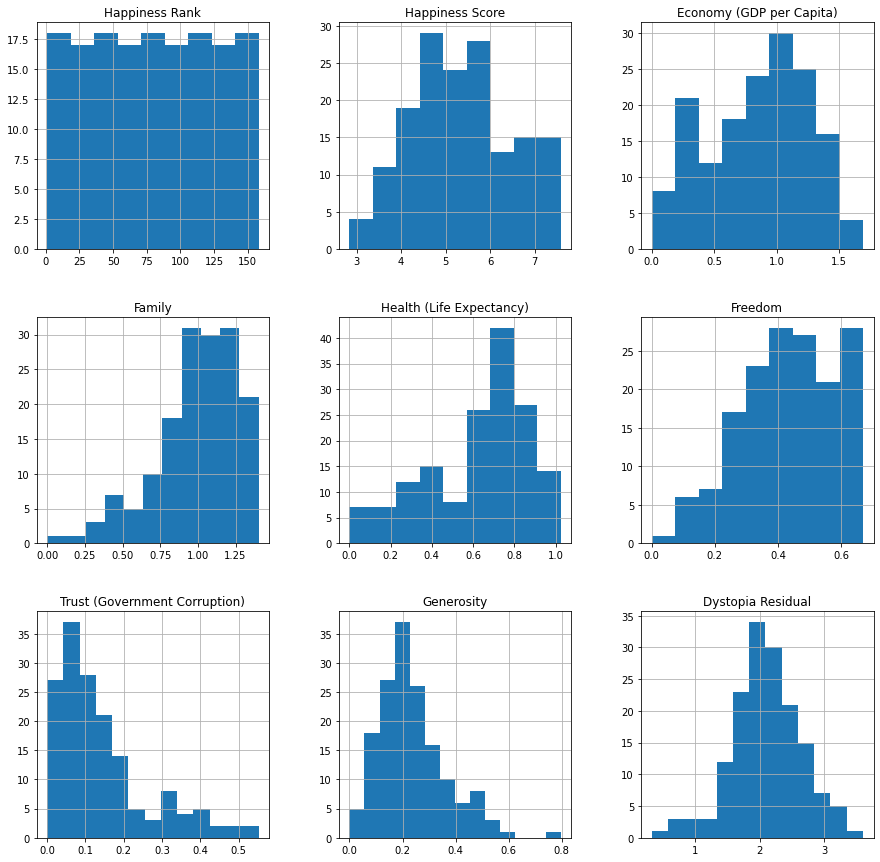

In [10]:
data.hist(bins='auto', figsize=(15,15))

Happiness Rank                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Happiness Score                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Family                            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Health (Life Expectancy)            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Freedom                          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Generosity                       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Trust (Government Corruption)    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Dystopia Residual                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

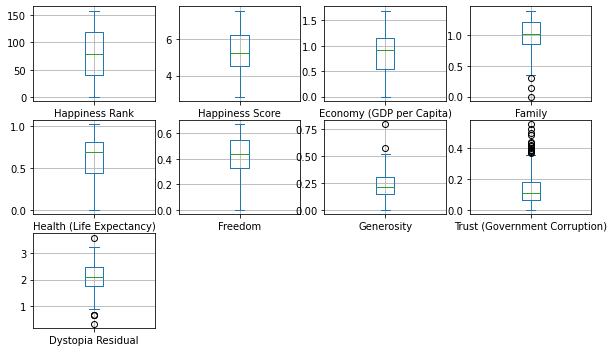

In [11]:
data[['Happiness Rank','Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)','Dystopia Residual']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

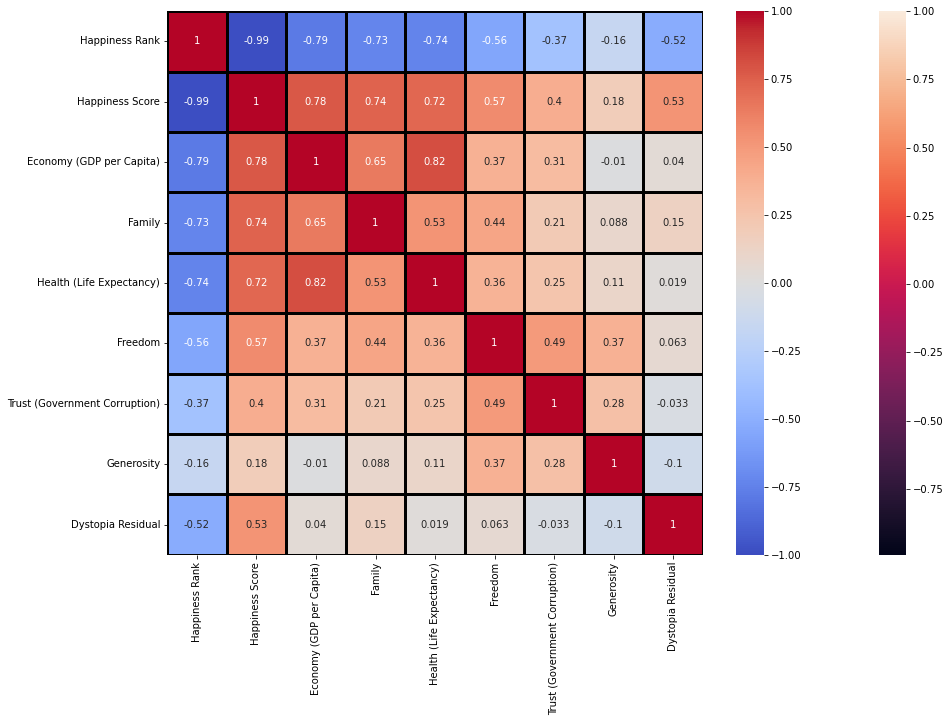

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())

sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')  

plt.show()

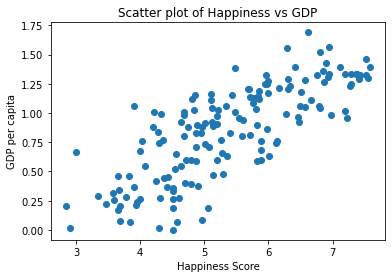

In [13]:
happiness_score = data['Happiness Score']
gdp= data['Economy (GDP per Capita)']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()

In [14]:
rich_countries = data[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)
rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [15]:
sad_countries = data[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
sad_countries.tail()

,Happiness Rank
Country,
Rwanda,154.0
Benin,155.0
Syria,156.0
Burundi,157.0
Togo,158.0


In [16]:
healthy_countries = data[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
healthy_countries.head()

,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562


In [17]:
low_life_expectancy = data[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)')
low_life_expectancy.tail()

,Country,Health (Life Expectancy)
35,Spain,0.95562
46,South Korea,0.96538
45,Japan,0.99111
71,Hong Kong,1.01328
23,Singapore,1.02525


In [18]:
new_happiness = data.drop(['Country', 'Happiness Rank','Region'], axis=1)
new_happiness.head()


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
new_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


In [20]:
X = new_happiness[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']]
y = new_happiness['Happiness Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
scale = StandardScaler()

new_happiness = scale.fit_transform(new_happiness)

In [22]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lm.predict(X_test)

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred 

,Actual,Predicted
7,7.364,6.949774
44,5.995,6.001739
113,4.633,4.448699
120,4.514,4.613922
63,5.716,5.912345
122,4.507,4.252135
121,4.512,4.073864
139,3.956,3.918721
109,4.686,4.710638
92,5.007,5.377577


In [24]:
coefficient = lm.coef_

coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,Economy (GDP per Capita),0.914757
1,Family,1.418679
2,Health (Life Expectancy),0.902836
3,Freedom,1.934132


In [25]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.5937109307075935
